In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
dts_iris = datasets.load_iris()
iris = pd.DataFrame(dts_iris['data'], columns=dts_iris.feature_names)
iris['class'] = dts_iris.target

In [ ]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = iris.drop(['class'], axis=1)
y = iris['class']

## 1. Holdout

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 2. Amostragem aleatória

In [ ]:
model_1 = KNeighborsClassifier(n_neighbors=3)
model_2 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
acc_1 = []
acc_2 = []
for i in range(0,10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  model_1.fit(X_train, y_train)
  y_pred_1 = model_1.predict(X_test)
  model_2.fit(X_train, y_train)
  y_pred_2 = model_2.predict(X_test)

  acc_1.append(accuracy_score(y_test, y_pred_1))
  acc_2.append(accuracy_score(y_test, y_pred_2))
  

## 3.Validação cruzada

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=3)
for train, test in skf.split(X, y):
  model.fit(X.iloc[train], y.iloc[train])
  y_pred = model.predict(X.iloc[test])
  acc = accuracy_score(y[test], y_pred)
  print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 100.00%
Accuracy: 93.33%
Accuracy: 100.00%
Accuracy: 93.33%
Accuracy: 86.67%
Accuracy: 100.00%
Accuracy: 93.33%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, X, y, cv=5)

In [ ]:
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')

In [ ]:
scores

array([0.96658312, 0.96658312, 0.93265993, 0.96658312, 1.        ])

## 3. LOO

In [ ]:
re = []
model = KNeighborsClassifier(n_neighbors=3)
for i in range(0, len(y)):
  x_ts = X.iloc[i,:]
  y_ts = y.iloc[i]
  x_tr = X.drop([i], 0)
  y_tr = y.drop([i], 0)
  model.fit(x_tr, y_tr)
  y_pred = model.predict(pd.DataFrame(x_ts).T)
  re.append(y_pred[0])

acc = accuracy_score(y, re)



In [ ]:
acc

0.96

## 4. Boostrap

In [ ]:
from sklearn.utils import resample

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
for i in range(0, 10):
  subset = resample(X, n_samples=100, replace=True)
  x_tr = subset
  y_tr = y[subset.index]
  x_ts = X.drop(subset.index,0)
  y_ts = y.drop(subset.index,0)
  model.fit(x_tr, y_tr)
  y_pred = model.predict(x_ts)
  acc = accuracy_score(y_ts, y_pred)
  print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 96.00%
Accuracy: 97.53%
Accuracy: 94.81%
Accuracy: 94.25%
Accuracy: 95.12%
Accuracy: 98.65%
Accuracy: 92.21%
Accuracy: 96.25%
Accuracy: 96.25%
Accuracy: 97.33%


## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

estimators = [('reduce_dim', PCA()), ('clf', KNeighborsClassifier(n_neighbors=3))]
pipe = Pipeline(estimators)
cross_val_score(pipe, X, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

## Curva ROC

In [ ]:
dts = datasets.load_breast_cancer()

X = dts.data
y = dts.target

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)

pred = model.predict(X_test)
probs = model.predict_proba(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
roc_auc

0.9758230452674896

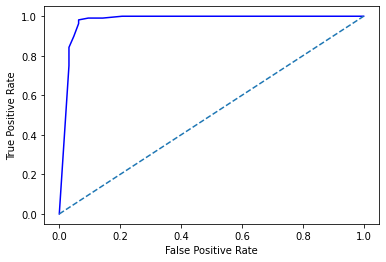

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'b')
plt.plot([0,1], [0,1], '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
probs

array([[0.72727273, 0.27272727],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.45454545, 0.54545455],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.27272727, 0.72727273],
       [0.18181818, 0.81818182],
       [0.        , 1.        ],
       [0.72727273, 0.27272727],
       [0.27272727, 0.72727273],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.90909091, 0.09090909],
       [0.81818182, 0.18181818],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.09090909, 0.90909091],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

## Inferência Estatística

In [ ]:
!pip install scikit-posthocs
#from numpy.random import rnd

     |████████████████████████████████| 43 kB 1.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=b94aa48968e8b9c8fde4dd8f2652b3e8ae743aa1e8c6d71dda700d7d59601115
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


## Wilcoxon

In [ ]:
from numpy.random import randn
cl1 = 5 * randn(25)+85
cl2 = 5 * randn(25)+80

print('Média de C1 ', np.mean(cl1))
print('Média de C2 ', np.mean(cl2))

Média de C1  86.7472691274511
Média de C2  80.5671028826991


### Plotting

In [ ]:
import seaborn as sns

In [ ]:
re1 = pd.DataFrame(cl1)
re1['classifier'] = 'C1'

re2 = pd.DataFrame(cl2)
re2['classifier'] = 'C2'

result_clf = pd.concat([re1, re2], axis=0, ignore_index=True)
result_clf.columns = ['acc', 'classifier']
result_clf

,acc,classifier
0,95.174259,C1
1,82.190354,C1
2,82.745479,C1
3,89.998163,C1
4,78.242137,C1
5,89.871162,C1
6,87.979885,C1
7,82.639416,C1
8,83.065979,C1
9,98.131072,C1


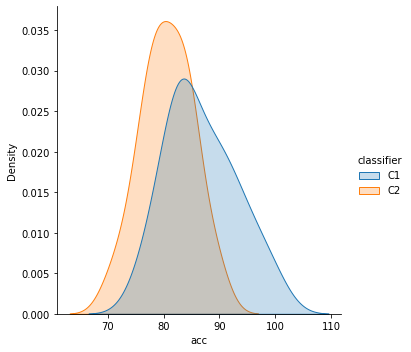

In [ ]:
sns.displot(result_clf, x='acc', kind="kde", fill=True, hue="classifier")

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
alpha = 0.05
_, p = wilcoxon(cl1, cl2)
print(p)
if p > alpha:
  print('Mesma distribuição (Não rejeita H0)')
else:
  print('Distribuições diferentes (Rejeita H0)')

0.0013027378387956868
Distribuições diferentes (Rejeita H0)


## Friedman Test

In [ ]:
from scipy.stats import friedmanchisquare

In [ ]:
from numpy.random import randn
cl1 = 5 * randn(30)+50
cl2 = 5 * randn(30)+52
cl3 = 5 * randn(30)+22
cl4 = 5 * randn(30)+50

data = np.array([cl1, cl2, cl3, cl4])

In [ ]:
stat, p = friedmanchisquare(cl1, cl2, cl3, cl4)

In [ ]:
import scikit_posthocs as sp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sp.posthoc_nemenyi_friedman(data.T)

,0,1,2,3
0,1.000,0.900000,0.001,0.900000
1,0.900,1.000000,0.001,0.611585
2,0.001,0.001000,1.000,0.001000
3,0.900,0.611585,0.001,1.000000
